In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

datapoints = pd.read_json("Results.json")
datapoints

,relaxTime,totalTime,gflop/s,matrixSize,iterations,numCores,size
0,"[0.000126, 0.000128, 0.00014000000000000001, 0...","[0.00045799999999999997, 0.0004489999999999999...","[5.090435, 5.006414, 4.583838, 4.98039, 5.03822]",16,500,0,0.001953
1,"[0.000265, 0.00025499999999999996, 0.000279, 0...","[0.000583, 0.000574, 0.0006129999999999999, 0....","[4.834129, 5.01646, 4.582804, 4.55582500000000...",16,1000,0,0.001953
2,"[0.000397, 0.000414, 0.0004, 0.000381999999999...","[0.000727, 0.000748, 0.0007329999999999999, 0....","[4.842188, 4.636449, 4.805129, 5.029628, 5.035...",16,1500,0,0.001953
3,"[0.000452, 0.00047099999999999996, 0.000477, 0...","[0.0009069999999999999, 0.000944, 0.001053, 0....","[5.665961, 5.438281, 5.368283, 5.474812, 5.723...",32,500,0,0.007812
4,"[0.000935, 0.0008709999999999999, 0.0009149999...","[0.0014039999999999999, 0.00133, 0.001374, 0.0...","[5.473255, 5.8772079999999995, 5.593037, 5.835...",32,1000,0,0.007812
...,...,...,...,...,...,...,...
160,"[89.183369, 89.274747, 89.345308, 89.458082, 8...","[89.581378, 89.648046, 89.733555, 89.832157, 8...","[3.762409, 3.758558, 3.75559, 3.750855, 3.760879]",8192,1000,4,512.000000
161,"[133.320007, 134.413466, 134.030288, 134.77683...","[133.699048, 134.790169, 134.403751, 135.16188...","[3.775251, 3.744539, 3.755244, 3.734444, 3.745...",8192,1500,4,512.000000
162,"[212.043871, 212.523651, 212.26353, 212.7147, ...","[213.546254, 214.027239, 213.766703, 214.20613...","[3.164858, 3.157713, 3.161582, 3.154877, 3.157...",16384,500,4,2048.000000
163,"[423.193557, 422.237838, 421.132616, 421.13019...","[424.704277, 423.741831, 422.640422, 422.64351...","[3.171545, 3.178723, 3.187066, 3.187084, 3.184...",16384,1000,4,2048.000000


/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


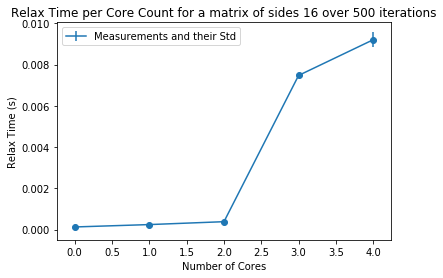

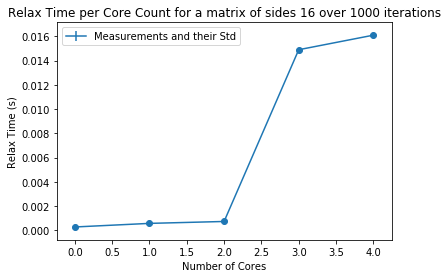

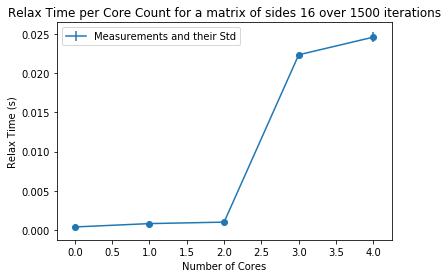

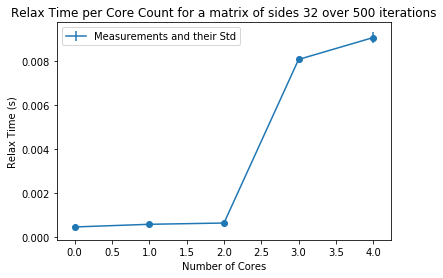

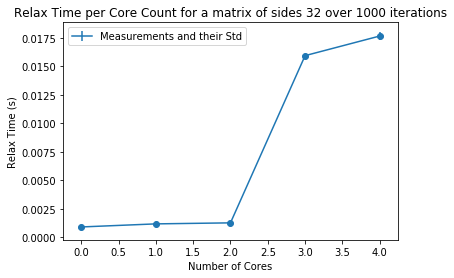

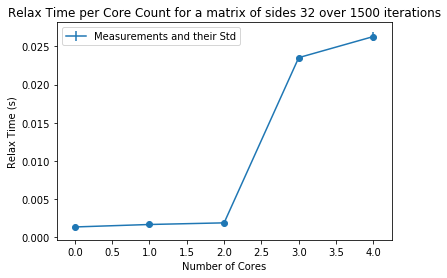

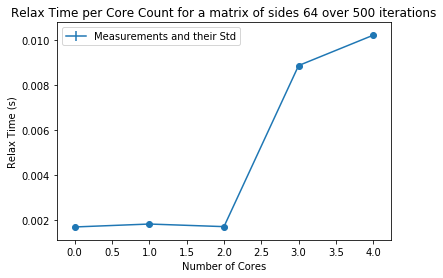

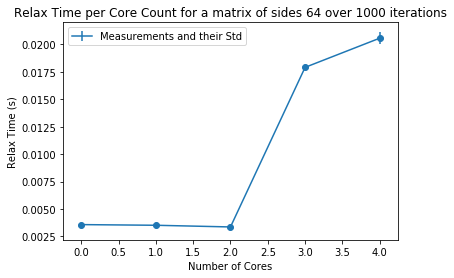

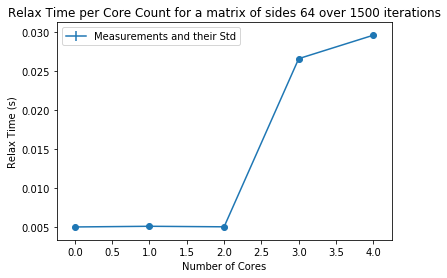

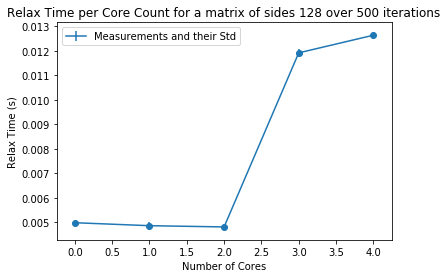

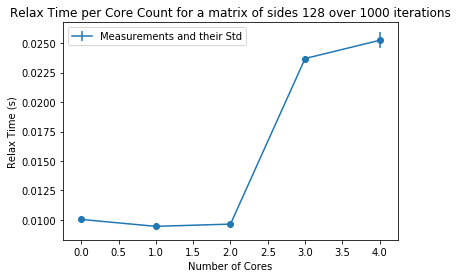

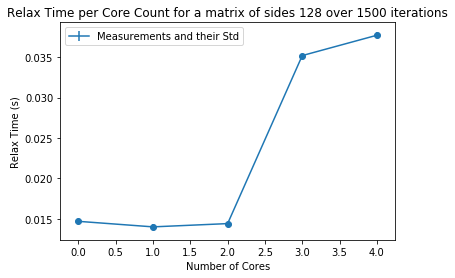

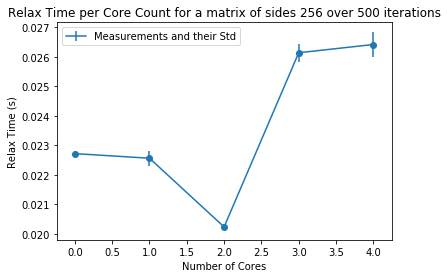

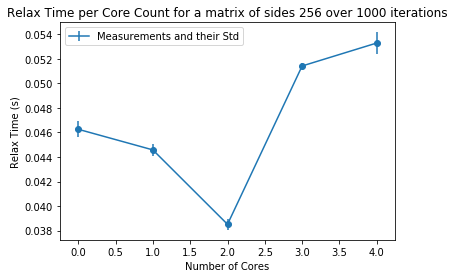

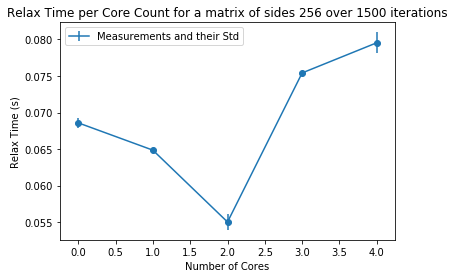

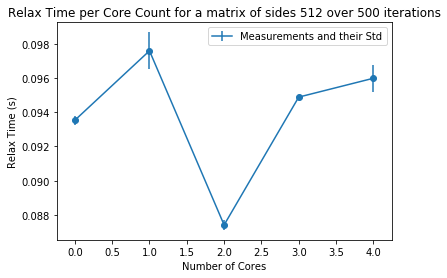

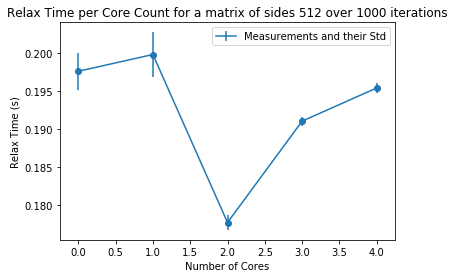

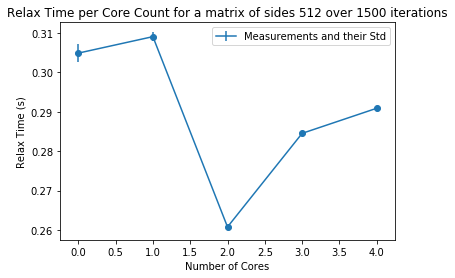

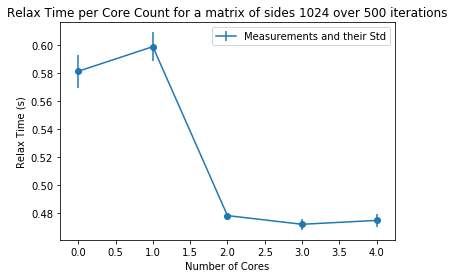

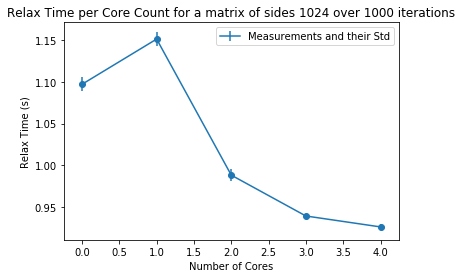

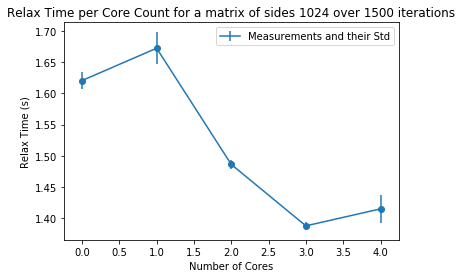

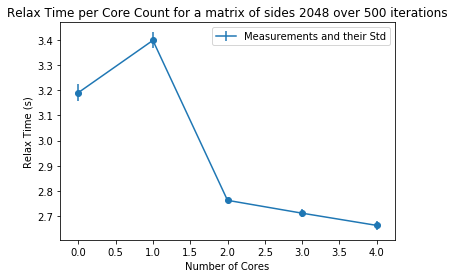

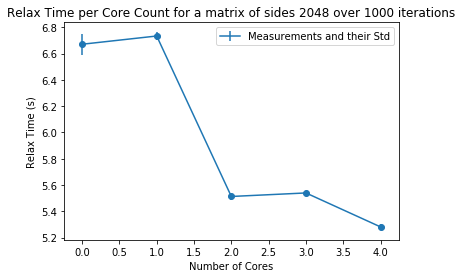

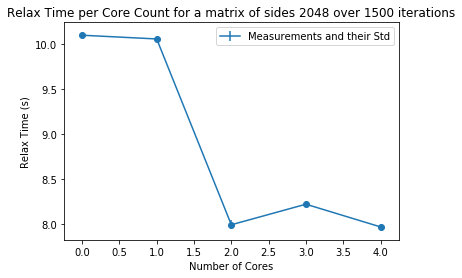

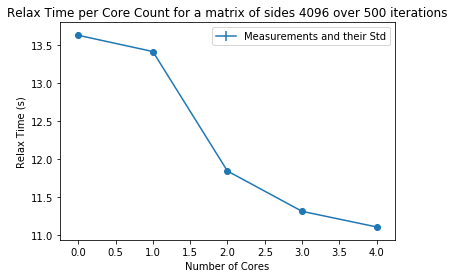

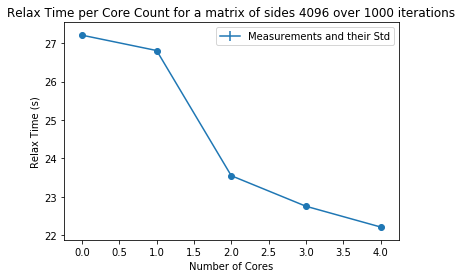

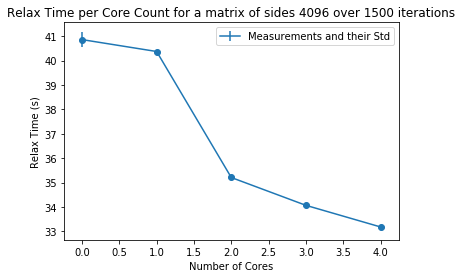

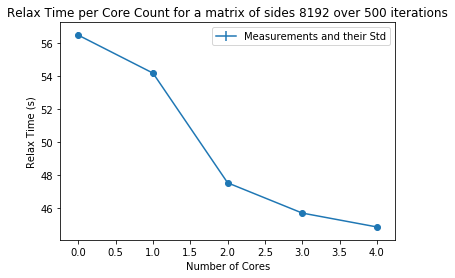

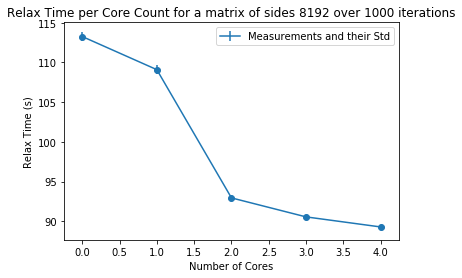

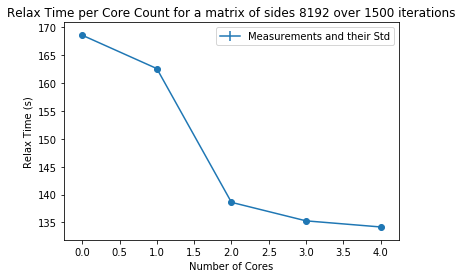

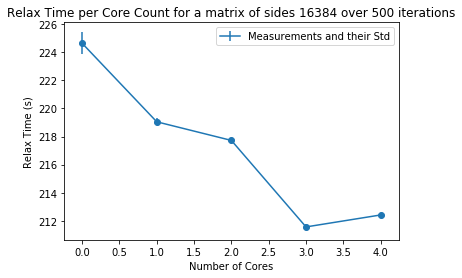

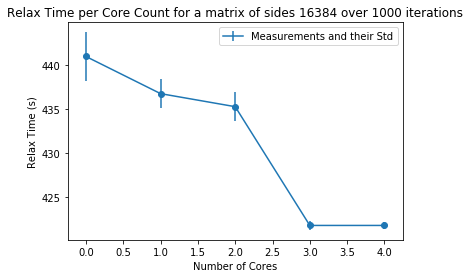

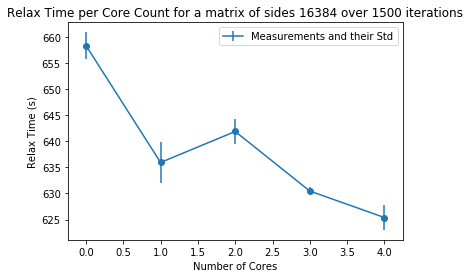

In [4]:
def generateGraphs(datapoints, graphName):
    data = pd.DataFrame(datapoints)
    #Total Time Averages and standard deviation
    total_time = np.array([i for i in data['totalTime']])
    average_total_time = np.average(total_time, axis = 1)
    std_total_time = np.std(total_time, axis = 1)/np.sqrt(np.shape(total_time)[1])
    data['averageTotalTime'] = average_total_time
    data['stdTotalTime'] = std_total_time
    
    #relaxTime Averages and standard deviation
    relax_time = np.array([i for i in data['relaxTime']])
    average_relax_time = np.average(relax_time, axis = 1)
    std_relax_time = np.std(relax_time, axis = 1)/np.sqrt(np.shape(relax_time)[1])
    data['averageRelaxTime'] = average_relax_time
    data['stdRelaxTime'] = std_relax_time
    
    #relaxTime Averages and standard deviation
    gflops = np.array([i for i in data['gflop/s']])
    average_gflops = np.average(gflops, axis = 1)
    std_gflops = np.std(gflops, axis = 1)/np.sqrt(np.shape(gflops)[1])
    data['averageGFLOP/s'] = average_gflops
    data['stdGFLOP/s'] = std_gflops
    
    #Create Plots of various results
    if graphName == 'matrixSize': 
        for core_count in data.numCores.unique():
            for it in data.iterations.unique():
                plt.figure()
                data0 = data[data['numCores'] == core_count]
                data0 = data0[data0['iterations'] == it]
                data0 = data0.sort_values('matrixSize')

                plt.errorbar(data0['matrixSize']**2, data0['averageRelaxTime'], yerr = data0['stdRelaxTime'], label = 'Measurements and their Std')
                plt.scatter(data0['matrixSize']**2, data0['averageRelaxTime'])
                plt.xlabel('Matrix Size Squared')
                plt.ylabel('Relax Time (s)')
                if core_count > 1:
                    plt.title(f'Relax Time per Matrix Size for {core_count:.0f} Cores over {it:.0f} iterations')
                elif core_count == 1:
                    plt.title(f'Relax Time per Matrix Size for {core_count:.0f} Core over {it:.0f} iterations')
                else: 
                    plt.title(f'Relax Time per Matrix Size without OpenMP over {it:.0f} iterations')
                plt.xscale('log', basex=2)
                plt.yscale('log')
                plt.legend()
    
    elif graphName == 'numCores':
        for mat_size in data.matrixSize.unique():
            for it in data.iterations.unique():
                plt.figure()
                data0 = data[data['matrixSize'] == mat_size]
                data0 = data0[data0['iterations'] == it]
                data0 = data0.sort_values('numCores')

                plt.errorbar(data0['numCores'], data0['averageRelaxTime'], yerr = data0['stdRelaxTime'], label = 'Measurements and their Std')
                plt.scatter(data0['numCores'], data0['averageRelaxTime'])
                plt.xlabel('Number of Cores')
                plt.ylabel('Relax Time (s)')
                plt.title(f'Relax Time per Core Count for a matrix of sides {(mat_size):.0f} over {it:.0f} iterations')
                plt.legend()
    elif graphName == 'GFLOPs':
        for core_count in [1, 4]:
            for it in data.iterations.unique():
                plt.figure()
                data0 = data[data['numCores'] == core_count]
                data0 = data0[data0['iterations'] == it]
                data0 = data0.sort_values('matrixSize')

                plt.errorbar(data0['matrixSize']**2, data0['averageGFLOP/s'], yerr = data0['stdGFLOP/s'], label = 'Measurements and their Std')
                plt.scatter(data0['matrixSize']**2, data0['averageGFLOP/s'])
                plt.xlabel('Matrix Size Squared')
                plt.ylabel('GFLOP/s')
                plt.title(f'GFLOP/s per Matrix Size without OpenMP over {it:.0f} iterations')
                plt.xscale('log', basex=2)
                plt.yscale('log')
                plt.legend()
    else:
        print('Unknown graph name')
    
    return data
    
data = generateGraphs(datapoints, 'numCores')
#data.head()

In [87]:
df = data[['matrixSize', 'iterations', 'numCores','averageRelaxTime']].copy()

df = df[df['iterations'] == 1500]

speedups = []
efficiencies = []
for mat_size in data.matrixSize.unique():
        #for it in data.iterations.unique():
            data0 = df[df['matrixSize'] == mat_size]
            data0 = data0.sort_values('numCores')
            
            speedup = float(data0['averageRelaxTime'][0:1])/data0['averageRelaxTime']
            speedups.append(list(speedup))
            efficiency = speedup[1:]/data0['numCores'][1:]
            efficiency = list(efficiency)
            efficiency.insert(0, 1)
            efficiencies.append((efficiency))
        

df = df.sort_values(['matrixSize', 'numCores'])
df['Speedup'] = np.array(speedups).flatten()
df['Efficiency'] = np.array(efficiencies).flatten()

In [88]:
df = df.round(3)
df.to_csv('results.csv')

In [70]:
(2**16)**2

4294967296